In [5]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [1]:
import numpy as np

X = np.array([-1, 1, 1, 1])
y = np.array([0, 1, 1, 1])

In [2]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

strategies = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']
constant_value = 1

for strategy in strategies:
    dummy_clf = DummyClassifier(strategy=strategy, constant=constant_value)
    dummy_clf.fit(X, y)
    
    y_pred = dummy_clf.predict(X)
    print(f"Strategy: {strategy.ljust(13)} -> accuracy: {dummy_clf.score(X, y):.2f} | F1 score: {f1_score(y, y_pred):.2f}")


Strategy: stratified    -> accuracy: 0.75 | F1 score: 0.40
Strategy: most_frequent -> accuracy: 0.75 | F1 score: 0.86
Strategy: prior         -> accuracy: 0.75 | F1 score: 0.86
Strategy: uniform       -> accuracy: 1.00 | F1 score: 0.40
Strategy: constant      -> accuracy: 0.75 | F1 score: 0.86


In [3]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

strategies = ['mean', 'median', 'quantile', 'constant']
quantile_value = 0.2
constant_value = 1

for strategy in strategies:
    dummy_reg = DummyRegressor(strategy=strategy, constant=constant_value, quantile=quantile_value)
    dummy_reg.fit(X, y)
    
    y_pred = dummy_reg.predict(X)
    print(f"Strategy: {strategy.ljust(8)} -> R2: {dummy_reg.score(X, y):.2f} | MSE: {mean_squared_error(y, y_pred, squared=False):.2f}")


Strategy: mean     -> R2: 0.00 | MSE: 0.43
Strategy: median   -> R2: -0.33 | MSE: 0.50
Strategy: quantile -> R2: -0.12 | MSE: 0.46
Strategy: constant -> R2: -0.33 | MSE: 0.50


In [6]:
print(confusion_matrix(y, y_pred))

[[0 1]
 [0 3]]


/home/valkea/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


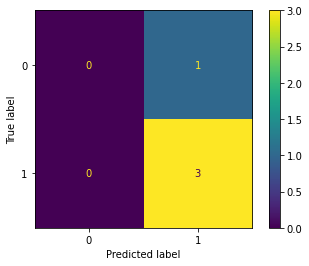

In [7]:
plot_confusion_matrix(dummy_clf, X, y)

In [8]:
print(classification_report(y, y_pred, zero_division=False))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

